In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('train_dataset.csv')

In [ ]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [ ]:
df.shape

(38984, 23)

In [ ]:
df.isna().sum()

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


## Import Necessary Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Train-Test Split

In [ ]:
# Example of splitting the data into features (X) and target (y)
X = df.drop(columns=['smoking'])  # Replace 'smoking' with the actual target column name
y = df['smoking']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the Data (Normalization)

In [ ]:
# Standardize the data using StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression Model

In [ ]:
# Initialize Logistic Regression model
logreg = LogisticRegression()

# Train the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

## Evaluate Model Accuracy

In [ ]:
y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7263


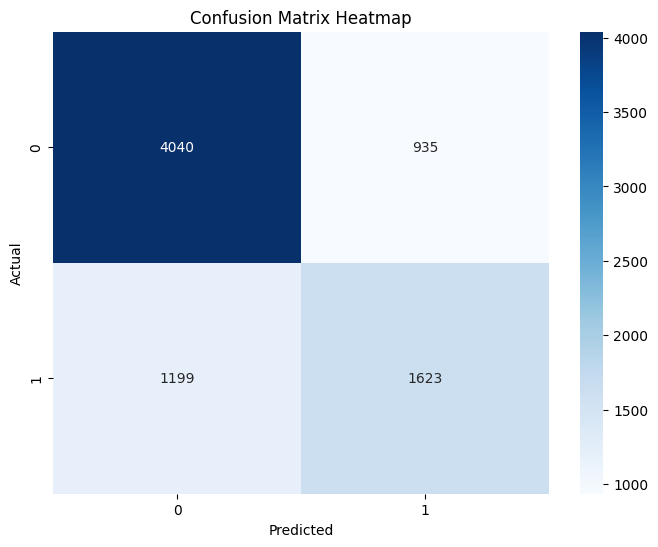

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Train SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}")

SVM Model Accuracy: 0.7308


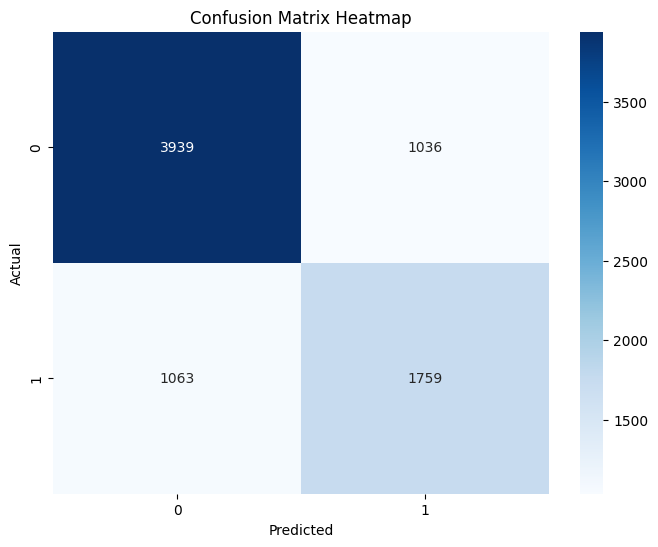

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

# Initialize SVM with RBF kernel
svm_model_rbf = SVC(kernel='rbf', random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model_rbf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the best model
best_svm_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred_rbf = best_svm_model.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVM (RBF) Accuracy with Tuning: {accuracy_rbf:.4f}")


## Train Neural Network Model

In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train.shape[1]
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_input', 0.1, 0.5, step=0.1)))

    # Hidden layers (tune number of layers)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # binary classification

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7231 - loss: 0.5167 - val_accuracy: 0.7402 - val_loss: 0.4856
Epoch 2/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7438 - loss: 0.4864 - val_accuracy: 0.7516 - val_loss: 0.4786
Epoch 3/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7536 - loss: 0.4746 - val_accuracy: 0.7490 - val_loss: 0.4765
Epoch 4/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7545 - loss: 0.4733 - val_accuracy: 0.7513 - val_loss: 0.4744
Epoch 5/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7550 - loss: 0.4676 - val_accuracy: 0.7539 - val_loss: 0.4756
Epoch 6/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7595 - loss: 0.4671 - val_accuracy: 0.7593 - val_loss: 0.4721
Epoch 7/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7641 - loss: 0.4643 - val_accuracy: 0.7597 - val_loss: 0.4715
Epoch 8/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7631 - loss: 0.4587 - val_accuracy: 0.7520 - val_

In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='dnn_tuning'
)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.5008
Neural Network Test Accuracy: 0.7541


In [ ]:

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early], batch_size=64)


Epoch 1/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8088 - loss: 0.3926 - val_accuracy: 0.7513 - val_loss: 0.5088
Epoch 2/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8095 - loss: 0.3932 - val_accuracy: 0.7541 - val_loss: 0.4988
Epoch 3/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8139 - loss: 0.3903 - val_accuracy: 0.7507 - val_loss: 0.5018
Epoch 4/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8134 - loss: 0.3890 - val_accuracy: 0.7512 - val_loss: 0.5035
Epoch 5/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8107 - loss: 0.3908 - val_accuracy: 0.7526 - val_loss: 0.5001
Epoch 6/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8107 - loss: 0.3921 - val_accuracy: 0.7534 - val_loss: 0.5040
Epoch 7/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8138 - loss: 0.3852 - val_accuracy: 0.7526 - val_loss: 0.5040


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found:")
print(f"Input layer units: {best_hps.get('units_input')}")
print(f"Number of hidden layers: {best_hps.get('num_layers')}")
print(f"Learning rate: {best_hps.get('lr')}")

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=64, callbacks=[stop_early])


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


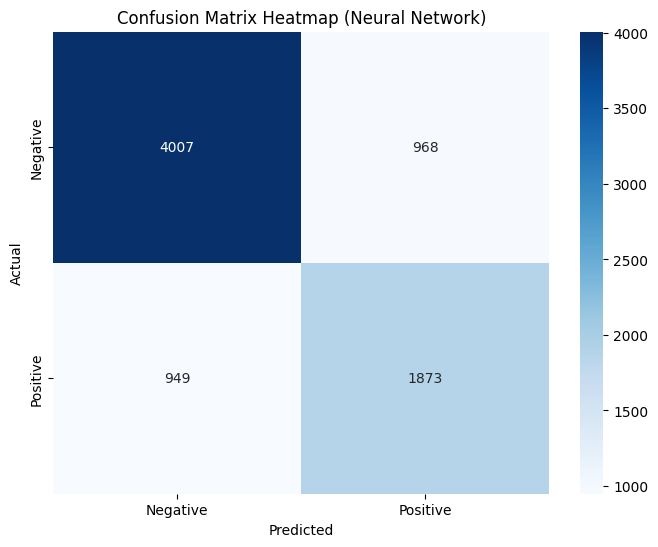

In [ ]:
# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Round the predictions to 0 or 1 (since it's binary classification)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Compute confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
